In [1]:
repo = "http://cran.us.r-project.org"
library(caret)
library(ggfortify)
library(ggplot2)
library(dplyr)
library(RSQLite)
library(DBI)
library(class)
library(pscl)

Warning message:
"package 'caret' was built under R version 3.3.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'ggfortify' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'RSQLite' was built under R version 3.3.3"Warning message:
"package 'DBI' was built under R version 3.3.3"Warning message:
"package 'pscl' was built under R version 3.3.3"Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Classes and Methods for R developed in the

Political Science Computational Laboratory

Department of Political Science

Stanford University



In [2]:
remove_cols= function(l, cols){
    return(l[! l %in% cols])
}

In [3]:
base_dir<- "C:/Users/Jeff/Documents/research/Sadler_3rdPaper/manuscript/"
data_dir<- "C:/Users/Jeff/Google Drive/research/Sadler_3rdPaper_Data/"
fig_dir <- paste(base_dir, "Figures/general/", sep="")
db_filename <- "floodData.sqlite"

In [4]:
con = dbConnect(RSQLite::SQLite(), dbname=paste(data_dir, db_filename, sep=""))

In [5]:
df = dbReadTable(con, 'for_model_avgs')

In [6]:
colnames(df)


[1] "event_date"  "event_name"  "num_flooded" "WDF2"        "WSF2"       
 [6] "AWDR"        "AWND"        "WGF6"        "WSF6"        "WDF6"       
[11] "ht"          "hht"         "lt"          "llt"         "r15"        
[16] "rhr"         "td_av"       "gw_av"       "r15mx"       "rhrmx"      
[21] "rd"          "r3d"

In [7]:
cols_to_remove = c('event_name', 'event_date', 'num_flooded')
in_col_names = remove_cols(colnames(df), cols_to_remove)
# in_col_names = c('td_av', 'llt')
out_col_name = 'num_flooded'

In [8]:
model_data = df[, append(in_col_names, out_col_name)]
nrow(model_data)
model_data = na.omit(model_data)
model_data = model_data[model_data[,'rd']>0.01,]
nrow(model_data)
model_data


[1] 2172

[1] 814

,WDF2,WSF2,AWDR,AWND,WGF6,WSF6,WDF6,ht,hht,lt,llt,r15,rhr,td_av,gw_av,r15mx,rhrmx,rd,r3d,num_flooded
1,121.66667,25.96667,291.66667,12.100000,12.100000,12.100000,291.66667,3.21050,3.61750,1.18600,0.53300,0.9729583,1.0587361,1.452974306,4.3406990,0.60500000,1.32250000,7.73250000,3.518000e+00,101
2,205.00000,15.00000,213.00000,2.700000,2.700000,2.700000,213.00000,0.66100,0.86100,-1.13000,-1.22350,-0.0140303,0.1098788,-0.202139583,2.2083260,0.03000000,0.07000000,0.22750000,4.500000e-02,2
3,158.75000,27.12500,133.00000,14.350000,13.953947,8.564103,133.61137,2.23750,4.96800,2.69850,-0.69250,2.2532500,2.4728611,1.095752604,2.3340485,0.35000000,1.10125000,6.29416667,3.080000e-01,110
4,48.09839,30.93389,123.00000,23.900000,20.061461,11.923954,110.73012,5.22800,5.57600,3.28400,1.58100,3.2158819,3.0279514,2.749343750,2.9984932,0.14000000,0.42625000,4.80583333,3.410000e-01,105
5,38.76321,25.98768,25.66667,21.183333,15.315069,8.769403,41.51250,3.49250,4.21250,2.08300,1.08450,2.6816875,2.8765764,2.244864583,2.1418366,0.37500000,0.80000000,3.67166667,9.240000e-01,36
6,205.55543,16.63738,213.00000,8.050000,9.721000,6.620833,222.54583,1.84200,2.63900,-0.98425,-0.98425,0.5756914,1.0167284,0.560302083,3.6207730,0.49888889,1.41333333,2.92333333,1.272727e-02,35
7,181.73207,12.57018,192.00000,9.250000,8.440377,5.730628,194.67782,1.04650,1.80950,-0.88900,-1.01400,0.3183000,0.3335333,0.306097917,2.3629127,0.01555556,0.01888889,0.01666667,2.727273e-03,1
8,160.62590,15.70444,138.00000,7.725000,7.648271,5.100042,201.54375,1.85100,2.11200,-0.74300,-0.76450,1.0789506,1.0209012,0.581873958,2.4327142,0.55666667,0.86111111,0.74750000,2.727273e-03,5
9,235.81490,19.83450,263.50000,13.600000,13.990583,8.885667,216.27292,1.83550,2.14250,0.66950,0.01800,0.9701358,1.0293210,0.668728125,2.1625958,0.22333333,0.38333333,1.03916667,1.363636e-02,8
10,250.19680,25.31077,218.00000,10.850000,10.333042,6.774792,225.89167,0.38750,1.35500,-1.76125,-1.76125,0.7570617,0.9575432,-0.288447917,0.7108298,0.46333333,0.90666667,1.36750000,2.727273e-03,2


In [9]:
prt = createDataPartition(model_data[, out_col_name], p=0.7)

In [10]:
train_data = model_data[prt$Resample1,]
train_in_data = model_data[prt$Resample1, in_col_names]
train_out_data = model_data[prt$Resample1, out_col_name]
test_in_data = model_data[-prt$Resample1, in_col_names]
test_out_data = model_data[-prt$Resample1, out_col_name]

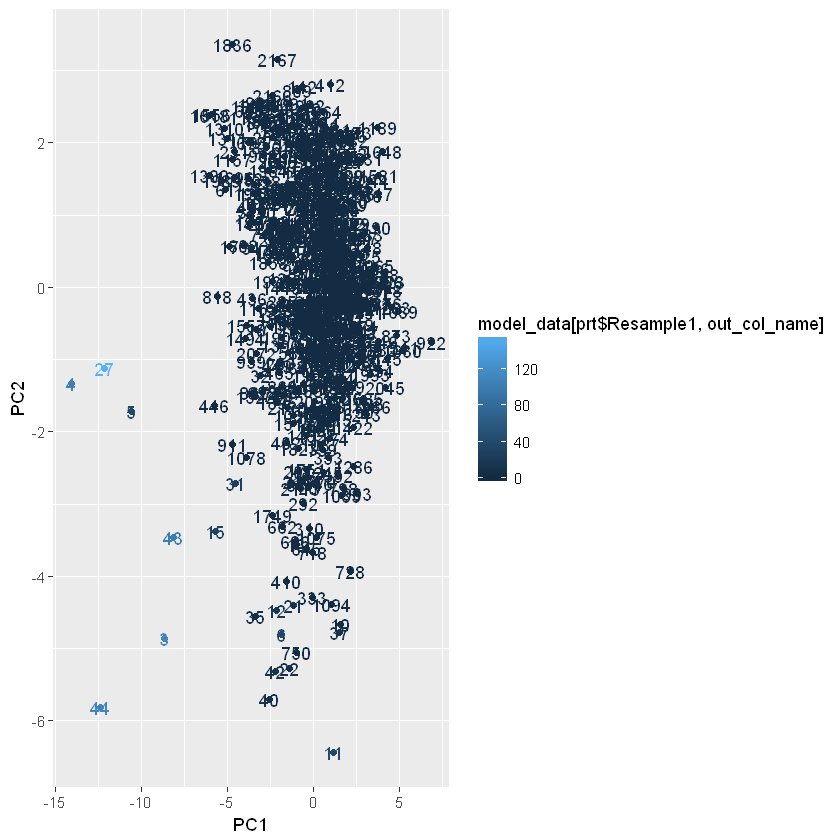

In [11]:
train_col_stds = apply(train_in_data, 2, sd)
train_col_means = colMeans(train_in_data)

train_normalized = t((t(train_in_data)-train_col_means)/train_col_stds)
test_normalized = t((t(test_in_data)-train_col_means)/train_col_stds)

pca = prcomp(train_normalized)
pca$x = -pca$x
pca$rotation=-pca$rotation
p = ggplot(pca$x[,c(1,2)], aes(x=PC1, y=PC2, colour=model_data[prt$Resample1, out_col_name], label=rownames(pca$x)))
p + geom_point() + geom_text()

In [12]:
trn_preprocessed = predict(pca, train_normalized)
tst_preprocessed = predict(pca, test_normalized)

In [13]:
fmla = as.formula(paste(out_col_name, "~", paste(colnames(trn_preprocessed), collapse="+")))
fmla

num_flooded ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + 
    PC9 + PC10 + PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + 
    PC18 + PC19

In [14]:
train_data = cbind(as.data.frame(trn_preprocessed), num_flooded = model_data[prt$Resample1, out_col_name])

In [15]:
output = zeroinfl(fmla, data=train_data, family = poisson)

Warning message:
"glm.fit: fitted rates numerically 0 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in optim(fn = loglikfun, gr = gradfun, par = c(start$count, start$zero, :
"unknown names in control: family"

In [16]:
summary(output)

## Train Data evaluation

In [17]:
train_fld = train_out_data[train_out_data>0]
pred_trn = predict(output, newdata = as.data.frame(trn_preprocessed), type='response')
pred_trn_capped = replace(pred_trn, pred_trn > 159, 159)
pred_trn_fld = pred_trn_capped[model_data[prt$Resample1, out_col_name]>0]

In [18]:
mean(abs(pred_trn_capped - train_out_data))
mean(abs(train_fld - pred_trn_fld))

[1] 0.5289567

[1] 6.010852

In [19]:
max_val = max(max(train_fld), max(pred_trn_fld))

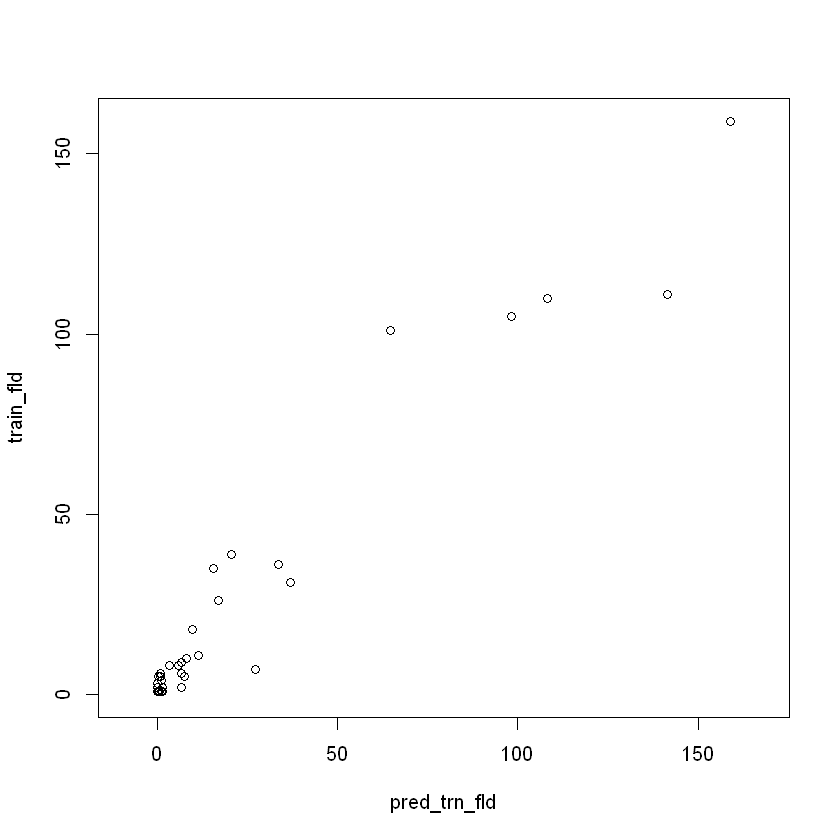

In [20]:
plot(pred_trn_fld, train_fld, asp=1, ylim=c(0,max_val), xlim=c(0,max_val))

## Test data

In [21]:
test_out_data
test_fld = test_out_data[test_out_data>0]
pred = predict(output, newdata = as.data.frame(tst_preprocessed), type='response')
max(pred)
pred_capped = replace(pred, pred > 159, 159)
pred_fld = pred_capped[model_data[-prt$Resample1, out_col_name]>0]
pred_capped

[1] 101   8  10  16   3   2  40   0   0   0   0   0   0   0   0   0   0   0
 [19]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [37]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [55]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [73]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [91]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[109]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[127]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[145]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[163]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[181]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[199]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[217]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[235]   0   0   0   0   0   0   0   0   0   0

[1] 210.721

1            9           23           26           29           36 
1.590000e+02 4.949905e+00 7.792237e+00 8.664035e-01 6.324358e-01 2.195306e-01 
          41           57           59           83           85           91 
3.166296e+01 1.186788e+01 7.137225e-02 8.035314e-02 6.592821e+00 3.644464e-04 
          92          105          119          123          146          149 
2.858428e-02 1.644332e-02 8.614166e-02 2.654533e+00 8.338424e-05 1.434938e-02 
         159          187          188          213          217          223 
9.301754e-03 8.114806e-01 1.530108e-02 7.066599e-01 3.419379e-02 6.957849e-04 
         237          238          242          254          260          272 
3.252248e-04 4.698949e-04 1.258962e-04 2.429286e-04 8.525972e-04 1.477432e-01 
         311          323          326          335          338          354 
3.238953e-02 1.936108e-01 2.220357e-02 3.263151e-01 1.316795e-03 2.466166e+00 
         360          363          380          381          405          409 
9.620738e-02 6.418092e-03 1.428915e-01 1.843799e-02 1.174723e-01 1.339339e-03 
         445          450          471          485          494          495 
6.510390e-03 6.939045e-02 2.478211e-04 1.360408e-03 1.030593e-01 3.372621e-03 
         499          505          513          518          527          548 
8.574981e-03 4.829798e-04 1.340499e-01 6.701065e-03 2.713331e-05 1.321440e-01 
         549          559          563          564          572          578 
1.281836e-02 7.150073e-04 9.873504e-04 7.993391e-04 3.471143e-02 2.259193e-03 
         582          592          594          600          604          605 
1.348696e-01 1.157663e-02 1.497105e-03 1.958450e-02 3.196890e-02 1.583182e-04 
         606          620          621          626          628          663 
1.408818e-03 3.751048e-02 9.780606e-03 2.545707e-03 5.060111e-03 2.706270e-03 
         680          683          689          692          702          708 
2.181981e-02 1.130613e+00 2.863107e-02 1.815012e-02 7.861267e-01 5.217099e-02 
         711          715          719          733          747          755 
6.450943e-02 2.481877e-02 1.157706e-02 1.101026e-01 8.754286e-02 5.995595e-03 
         761          762          771          772          775          786 
4.735161e-03 6.964243e-02 4.446276e-04 2.650348e-04 3.120643e-02 2.587855e-02 
         790          831          846          850          854          858 
2.005435e-01 6.411092e-03 2.380250e-03 4.537979e-03 5.235637e-03 4.237776e-03 
         870          883          887          888          897          899 
6.183403e-04 5.068227e-04 1.946279e-03 1.721972e-03 1.930852e-02 2.625402e-02 
         914          919          920          925          926          936 
3.902842e-03 2.323218e-03 1.770069e-03 1.294207e-04 8.840000e-03 4.137008e-03 
         937          947          949          966          981         1000 
5.601939e-01 1.762709e-03 8.434818e-03 6.613049e-03 1.463037e-03 1.402401e-03 
        1011         1013         1041         1051         1052         1055 
4.740372e-04 6.683785e-02 1.039074e+00 4.675326e-02 2.588539e-02 1.880975e-02 
        1064         1066         1067         1090         1095         1096 
1.081144e-01 5.065869e-04 8.568472e-04 4.021389e-03 2.477767e-02 2.885945e-02 
        1100         1103         1115         1118         1152         1155 
8.900341e-03 1.090869e-03 1.169142e-01 5.087750e-02 6.961192e-01 7.475665e-02 
        1158         1191         1207         1220         1264         1269 
2.456210e-04 4.260319e-02 4.538942e-03 1.012461e-02 1.059265e-02 1.904935e-03 
        1270         1278         1296         1299         1309         1327 
1.146246e-02 2.386660e-04 8.351108e-03 1.931302e-03 2.041271e-03 6.411419e-03 
        1339         1349         1352         1381         1382         1423 
7.136999e-01 2.894156e-03 1.571825e-03 2.788471e-01 2.204283e-02 1.027093e-02 
        1437         1438         1439         1441         1

In [22]:
sort(pred_capped)

527         1959         1940          146         1681          242 
2.713331e-05 5.538516e-05 7.737529e-05 8.338424e-05 9.370033e-05 1.258962e-04 
         925          605         1278          254         1158          471 
1.294207e-04 1.583182e-04 2.386660e-04 2.429286e-04 2.456210e-04 2.478211e-04 
         772          237           91         1878         1965          771 
2.650348e-04 3.252248e-04 3.644464e-04 3.682438e-04 4.160038e-04 4.446276e-04 
        1480         1473          238         1011          505         1066 
4.603242e-04 4.658427e-04 4.698949e-04 4.740372e-04 4.829798e-04 5.065869e-04 
         883          870          223          559         1957          564 
5.068227e-04 6.183403e-04 6.957849e-04 7.150073e-04 7.980375e-04 7.993391e-04 
         260         1067         2034         2051          563         1103 
8.525972e-04 8.568472e-04 9.026768e-04 9.510192e-04 9.873504e-04 1.090869e-03 
        2119         1690          338          409          485         1000 
1.108117e-03 1.140757e-03 1.316795e-03 1.339339e-03 1.360408e-03 1.402401e-03 
         606          981          594         1352         2116          888 
1.408818e-03 1.463037e-03 1.497105e-03 1.571825e-03 1.599701e-03 1.721972e-03 
         947          920         2164         1269         1776         1299 
1.762709e-03 1.770069e-03 1.870050e-03 1.904935e-03 1.922953e-03 1.931302e-03 
         887         1309         1487         2095          578         1441 
1.946279e-03 2.041271e-03 2.070248e-03 2.207991e-03 2.259193e-03 2.306702e-03 
         919         1437          846         1655          626         1919 
2.323218e-03 2.338599e-03 2.380250e-03 2.539318e-03 2.545707e-03 2.659277e-03 
         663         1349         1634          495         1706          914 
2.706270e-03 2.894156e-03 3.360226e-03 3.372621e-03 3.566261e-03 3.902842e-03 
        1090          936          858         1750         1897          850 
4.021389e-03 4.137008e-03 4.237776e-03 4.369411e-03 4.444469e-03 4.537979e-03 
        1207          761         2006          628          854          755 
4.538942e-03 4.735161e-03 4.956143e-03 5.060111e-03 5.235637e-03 5.995595e-03 
        1869         1577          831         1327          363          445 
6.133504e-03 6.352092e-03 6.411092e-03 6.411419e-03 6.418092e-03 6.510390e-03 
         966         1879          518         1661         1486         2162 
6.613049e-03 6.686786e-03 6.701065e-03 7.411522e-03 7.609363e-03 8.243582e-03 
        1296         1613          949          499         2028          926 
8.351108e-03 8.393116e-03 8.434818e-03 8.574981e-03 8.623577e-03 8.840000e-03 
        1100         1600          159          621         1220         1423 
8.900341e-03 9.001327e-03 9.301754e-03 9.780606e-03 1.012461e-02 1.027093e-02 
        1264         1590         1490         1270          592          719 
1.059265e-02 1.108502e-02 1.135814e-02 1.146246e-02 1.157663e-02 1.157706e-02 
        1543          549         2087         1785          149         1780 
1.169942e-02 1.281836e-02 1.346587e-02 1.358795e-02 1.434938e-02 1.494384e-02 
         188         1980         1505          105         1610         1637 
1.530108e-02 1.558776e-02 1.634817e-02 1.644332e-02 1.661664e-02 1.746726e-02 
         692          381         2169         1055          897          600 
1.815012e-02 1.843799e-02 1.873833e-02 1.880975e-02 1.930852e-02 1.958450e-02 
        1624         2032         1450          680         1382          326 
1.994217e-02 2.081197e-02 2.113529e-02 2.181981e-02 2.204283e-02 2.220357e-02 
        1095          715         2033          786         1052          899 
2.477767e-02 2.481877e-02 2.534141e-02 2.587855e-02 2.588539e-02 2.625402e-02 
          92          689         1096         1734          775         1814 
2.858428e-02 2.863107e-02 2.885945e-02 2.939555e-02 3.120643e-02 3.124934e-02 
         604          311         1629          217        

In [23]:
mean(abs(pred_capped - test_out_data)^2)
mean(abs(test_fld - pred_fld))

[1] 15.99921

[1] 12.98236

In [24]:
max_val = max(max(test_fld), max(pred_fld))

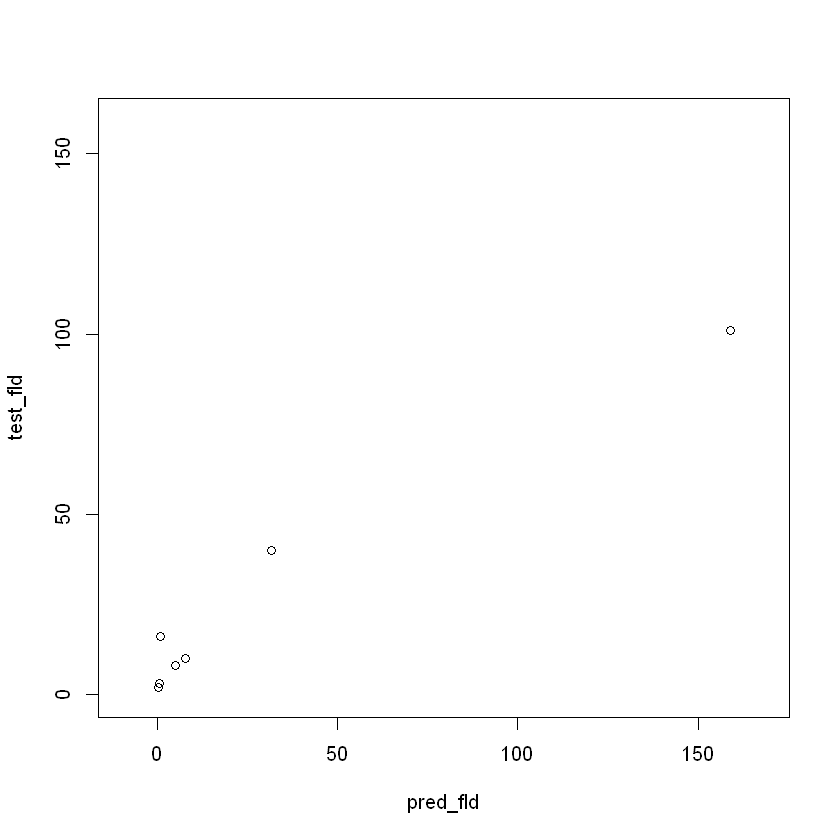

In [25]:
plot(pred_fld, test_fld, asp=1, ylim=c(0,max_val), xlim=c(0,max_val))

In [26]:
with(output, cbind(res.deviance = deviance, df = df.residual, p = pchisq(deviance, df.residual, lower.tail=FALSE)))

ERROR: Error in pchisq(deviance, df.residual, lower.tail = FALSE): Non-numeric argument to mathematical function
